In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
import os
from datetime import datetime

In [4]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [5]:
from plotly import __version__
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
from pandas_datareader import data as pdr
import pandas as pd
import datetime
import yfinance as yfin
yfin.pdr_override()

In [7]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2023, 1, 1)

In [8]:
BTC = pdr.get_data_yahoo("BTC-USD", start, end)
df = BTC
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


<Axes: xlabel='Date'>

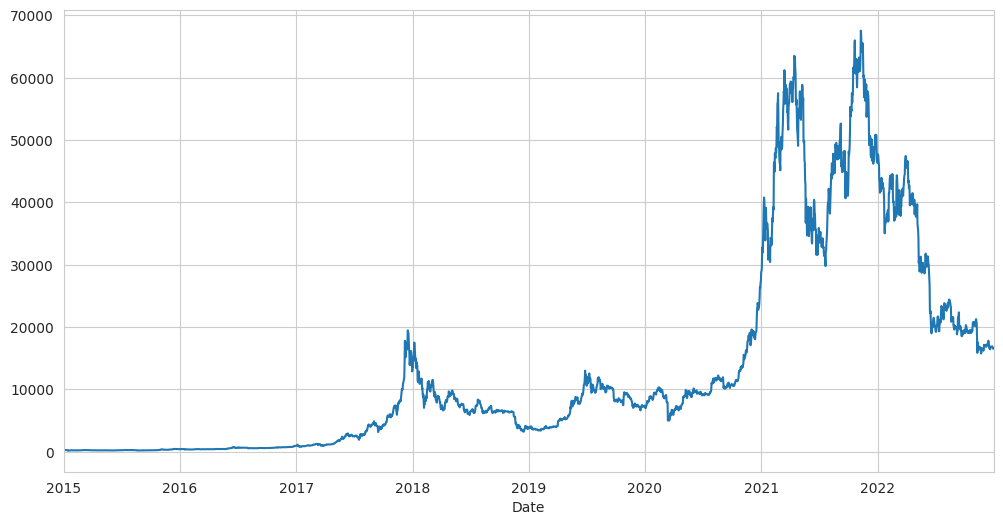

In [25]:
df['Open'].plot(figsize=(12, 6))

<Axes: xlabel='Date'>

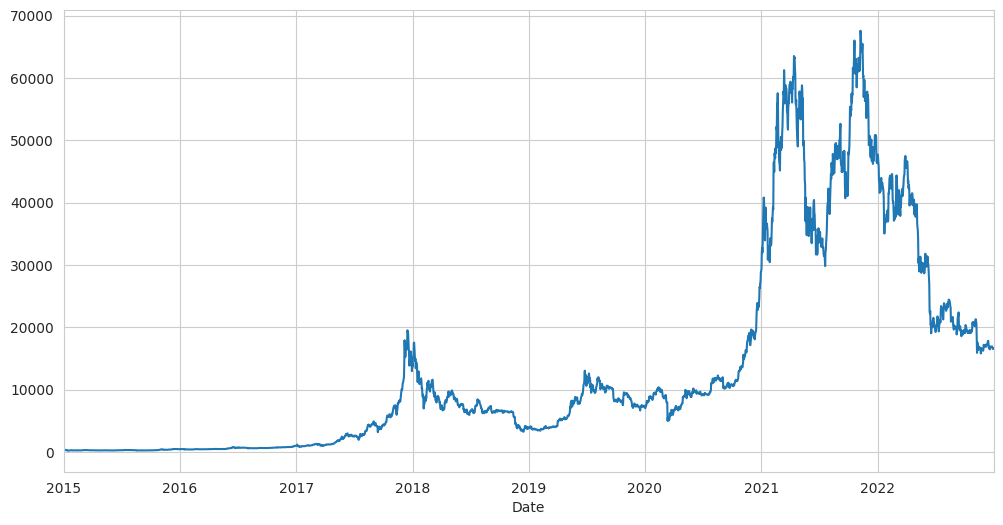

In [24]:
df['Close'].plot(figsize=(12, 6))

In [22]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=2922, freq=None)

In [31]:
index = df.loc['2015-01-01':'2022-12-31'].index

In [27]:
btc_open  = df.loc['2015-01-01':'2022-12-31']['Open']
btc_close = df.loc['2015-01-01':'2022-12-31']['Close']

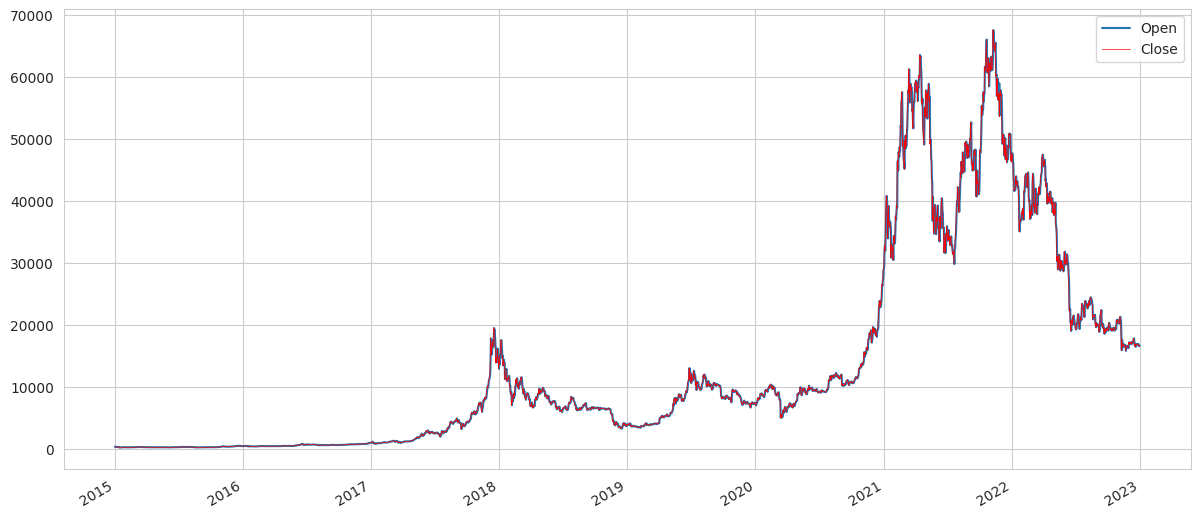

In [38]:
figure, axes = plt.subplots(figsize=(12, 6))
plt.tight_layout()
figure.autofmt_xdate()
axes.plot(index, btc_open, alpha=1)
axes.plot(index, btc_close, linewidth = 0.5, color='red')
plt.legend(labels=['Open', 'Close'])

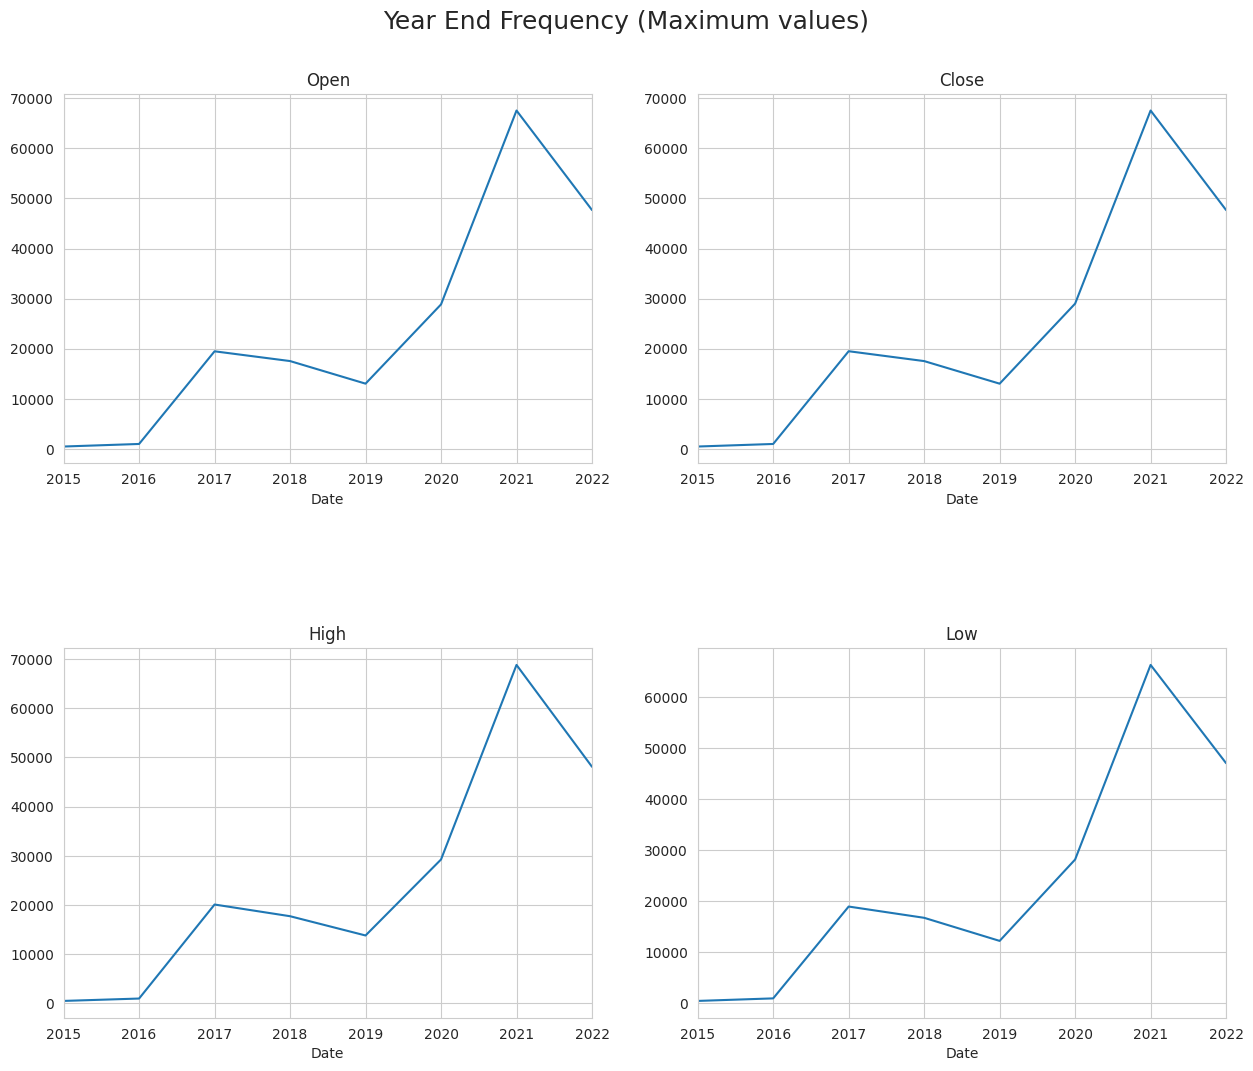

In [11]:
col_name = ['Open', 'Close', 'High','Low']

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Year End Frequency (Maximum values)', fontsize=18, y=0.95)

for col_name, ax in zip(col_name, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.resample(rule='A').max()[col_name].plot(ax=ax)
    ax.set_title(col_name)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [13]:
df_non_indexed = df.reset_index('Date')
df_non_indexed.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [14]:
df_non_indexed['Year'] = df_non_indexed['Date'].dt.year
df_non_indexed.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,2015


In [15]:
fig = px.line(df_non_indexed, x='Date', y='High')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(count=5, label='5y', step='year', stepmode='backward'),
            dict(count=6, label='6y', step='year', stepmode='backward'),
            dict(count=7, label='7y', step='year', stepmode='backward'),
            dict(count=8, label='8y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

In [16]:
fig = px.line(df_non_indexed, x='Date', y='Low')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(count=5, label='5y', step='year', stepmode='backward'),
            dict(count=6, label='6y', step='year', stepmode='backward'),
            dict(count=7, label='7y', step='year', stepmode='backward'),
            dict(count=8, label='8y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

In [17]:
df['Open: 30 Days rolling'] = df['Open'].rolling(30).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open: 30 Days rolling
Date,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,NaN
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,NaN
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,NaN


<Axes: xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

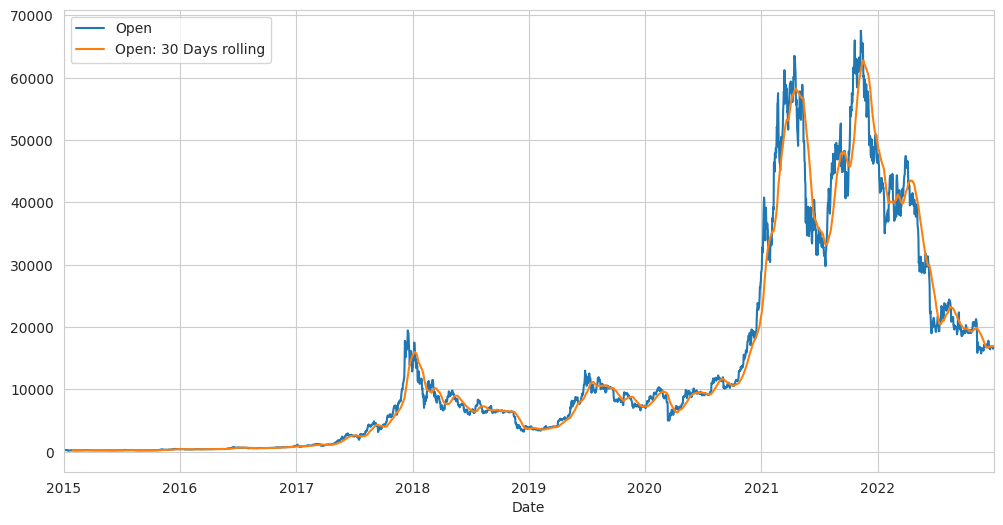

In [18]:
plt.figure(figsize=(12, 6))
df[['Open', 'Open: 30 Days rolling']].plot(figsize=(12, 6))